In [9]:
import numpy as np
import json
import pandas as pd
import time
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from ggplot import *
from sklearn.decomposition import PCA

def tsne(path, title):
    db = json.load(open(path, 'r'))
    save_as = path.split('/')[-1].split('.')[0] + '.png'
    print(save_as)
    X = []
    y = []
    y_text = []
    for ind, key in enumerate(db.keys()):
        for entry in db[key]:
            y.append(ind)
            y_text.append(key)
            X.append(entry)
        if ind == 10-1:
            break
    X = np.array(X)
    y = np.array(y)
    print(X.shape)
    print(y.shape)

    feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

    df = pd.DataFrame(X,columns=feat_cols)
    df['label'] = y
    df['label'] = df['label'].apply(lambda i: str(i))

    X, y = None, None

    print('Size of the dataframe: {}'.format(df.shape))

    rndperm = np.random.permutation(df.shape[0])

#     # Plot the graph
#     plt.gray()
#     fig = plt.figure( figsize=(16,7) )
#     for i in range(0,30):
#         ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
#         ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((2**5,2**4)).astype(float))
#     plt.show()

    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(df[feat_cols].values)

    df['pca-one'] = pca_result[:,0]
    df['pca-two'] = pca_result[:,1] 
    df['pca-three'] = pca_result[:,2]

    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

    chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
            + geom_point(size=75,alpha=0.8) \
            + ggtitle("First and Second Principal Components colored by digit")
    chart

    n_sne = 160

    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols].values)

    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    df_tsne = df.loc[rndperm[:n_sne],:].copy()
    df_tsne['x-tsne'] = tsne_results[:,0]
    df_tsne['y-tsne'] = tsne_results[:,1]

#     chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
#             + geom_point(size=70,alpha=0.8) \
#             + ggtitle("tSNE dimensions colored by digit")
    chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.8)  \
        + ggtitle(title)
    chart.save(save_as)
    

ours_test_data_all.png
(158, 512)
(158,)
Size of the dataframe: (158, 513)
Explained variation per principal component: [0.22100835 0.16982807 0.10112084]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 158 samples in 0.000s...
[t-SNE] Computed neighbors for 158 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 158 / 158
[t-SNE] Mean sigma: 0.463412
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.893280
[t-SNE] Error after 300 iterations: 0.422996
t-SNE done! Time elapsed: 0.7475099563598633 seconds
ours_test_50perc_data_all.png
(158, 512)
(158,)
Size of the dataframe: (158, 513)
Explained variation per principal component: [0.20460815 0.18356754 0.10672909]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 158 samples in 0.000s...
[t-SNE] Computed neighbors for 158 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 158 / 158
[t-SNE] Mean sigma: 0.453382
[t-SNE] KL divergence after 250 iteration

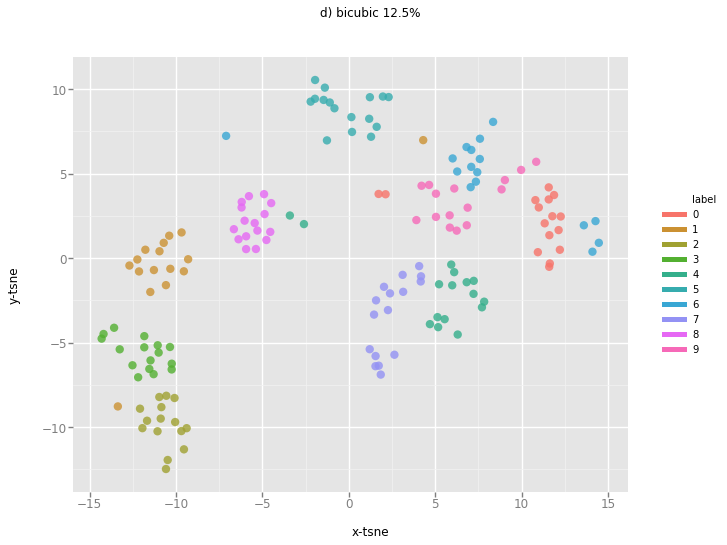

In [12]:
tsne('db/split-2-8/ours_test_data_all.json', title='a) original')
tsne('db/split-2-8/ours_test_50perc_data_all.json', title='b) bicubic 50%')
tsne('db/split-2-8/ours_test_25perc_data_all.json', title='c) bicubic 25%')
tsne('db/split-2-8/ours_test_12perc_data_all.json', title='d) bicubic 12.5%')